In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('height-weight.csv')

In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [5]:
df.shape

(23, 2)

In [6]:
##conclusion: Both the feature is integer
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 496.0 bytes


In [7]:
##conclusion: There is no null values are present in the dataset
df.isnull().sum()

Weight    0
Height    0
dtype: int64

In [8]:
## Mathematical description of the dataset
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [12]:
## one duplicate value is present so drop down that value
df.drop_duplicates(inplace=True)

In [14]:
## Now there is no any duplicate value is present in the dataset
df.duplicated().sum()

0

In [15]:
## Independent And Dependent Feature separate
X = df[['Weight']] ##Independent Feature
y = df['Height'] ##Dependent Feature

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [21]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((17, 1), (5, 1), (17,), (5,))

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
X_train_scaled = scaler.fit_transform(X_train)

In [25]:
X_test_scaled = scaler.transform(X_test)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
regression = LinearRegression()

In [30]:
regression.fit(X_train_scaled,y_train)

LinearRegression()

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'This is the Graph of Weight and Height')

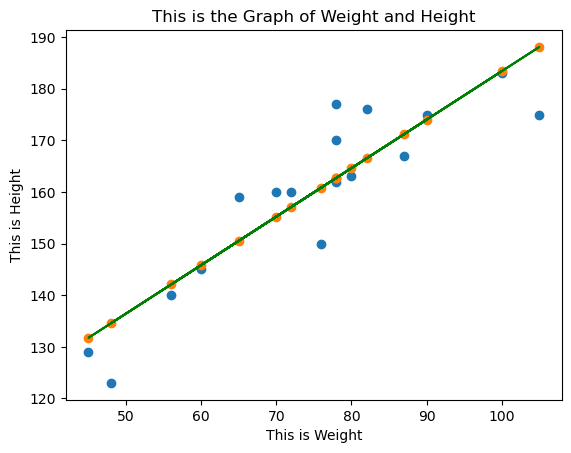

In [43]:
plt.scatter(X_train,y_train)
plt.scatter(X_train,regression.predict(X_train_scaled))
plt.plot(X_train,regression.predict(X_train_scaled),'g')
plt.xlabel('This is Weight')
plt.ylabel('This is Height')
plt.title('This is the Graph of Weight and Height')

In [53]:
y_pred_test = regression.predict(X_test_scaled)

In [54]:
y_test

0     120
14    170
8     182
1     135
16    140
Name: Height, dtype: int64

In [56]:
y_pred_test

array([131.74187432, 169.31717226, 178.71099675, 143.95384615,
       136.43878657])

In [57]:
import pickle

In [59]:
pickle.dump(regression,open('Model_regression_height_weight.pkl','wb'))
pickle.dump(scaler,open('Model_scaler_height_weight.pkl','wb'))

In [60]:
model_regression = pickle.load(open('Model_regression_height_weight.pkl','rb'))
model_scaled = pickle.load(open('Model_scaler_height_weight.pkl','rb'))

In [62]:
ready = model_scaled.transform([[90]])
result = model_regression.predict(ready)
print(result[0])

174.01408450704227


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
